<a href="https://colab.research.google.com/github/ParthSharma1197/EDA-Capston-Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [214]:
## let's import the libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns



from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor




In [215]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
#loading the dataset
df_Rbike=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE EDA-Bike Sharing Demand Prediction /SeoulBikeData.csv',encoding ='latin')

In [217]:
# view of the first five rows of the data:
df_Rbike.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

## **Unvieling the mystry in the dataset**




In [218]:
#to have a view over the number of shape of the dataset
df_Rbike.shape

(8760, 14)

In [219]:
#General go through on the dataset to check the datatype
df_Rbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [220]:
# We will have a look at the basic statistical characteristics of each numerical feature 
df_Rbike.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

Here we have an observation from the above description that 'Rented Bike Count','Visiblity' are the ones where there is considerable difference between the mean and median and we can say that these might have a skewed distribution.Otherwise, almost all the other do not have much difference. 

In [221]:
#a normal check over for the null/missing values
df_Rbike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [222]:
#having a look at the unique value
df_Rbike.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [223]:
#Just having a look at various input features to analyse which of them are relevant for our analysis.
df_Rbike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## * Now, we will head towards our next stage i.e **Data Pre-processing**

The majority of the real-world datasets are highly susceptible to missing, inconsistent, and noisy data due to their heterogeneous origin. 

Applying algorithms on this noisy data would not give quality results as they would fail to identify patterns effectively. Data Processing is, therefore an important step or stage to improve the overall data quality.

Duplicate or missing values may give an incorrect view of the overall statistics of data.
Outliers and inconsistent data points often tend to disturb the model’s overall learning, leading to false predictions.
Quality decisions must be based on quality data. Data Preprocessing is important to get this quality data, without which it would just be a Garbage In, Garbage Out scenario.

Major Tasks in Data Preprocessing:
1. Data cleaning
2. Data integration
3. Data reduction
4. Data transformatio

### **Handling the Missing Values**

In [224]:
#a normal check over for the null/missing values
df_Rbike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Luckily there are no null values.Very rare sight to have

#####  **We can check for duplicate values in our dataset as the presence of duplicate values will hamper the accuracy of our ML model.**

In [225]:
# check for the missing values
duplicate=df_Rbike.duplicated().sum()
print("The number of duplicate values in the data set are:",duplicate)

The number of duplicate values in the data set are: 0


Hence we can say that the number of duplicated values and Missing Values in our are ZERO in our dataset.Therefore no action to be taken on the data set on this regard.

**We need to rename the columns in such a way that easy to access and used during our analysis.**
 
  1.We will eliminate the space present where multiple words present in a column name.


  2.We will remove the unit present in order to make the use easy. 




In [226]:
#renaming the column:
df_Rbike=df_Rbike.rename(columns={'Date':'date','Rented Bike Count':'rented_bike_count','Temperature(°C)':'temperature',
                                'Hour':'hour','Humidity(%)':'humidity','Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility','Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation','Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall','Seasons':'seasons','Holiday':'holiday','Functioning Day':'functioning_day'})

In [227]:
#Checking for the changes made on the dataset:
df_Rbike.head()

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   visibility  dew_point_temperature  solar_radiation  rainfall  snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  seasons     holiday functioning_day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

In [228]:
#Let's have a look at the datatypes of all the columns to get them is a proper format:
df_Rbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented_bike_count      8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind_speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew_point_temperature  8760 non-null   float64
 8   solar_radiation        8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowfall               8760 non-null   float64
 11  seasons                8760 non-null   object 
 12  holiday                8760 non-null   object 
 13  functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

### **Tackling with each column one by one:**

First column is the date column since it is object dtype, we need to convert it to date dtype so that we can extract numerous information for this date column only

In [229]:
## Breaking the date column into informative form to make it productive for our model.
df_Rbike['date'] = pd.to_datetime(df_Rbike['date'])

In [230]:
#informative features extracted from the date column 
df_Rbike['year'] = df_Rbike['date'].dt.year
df_Rbike['month'] = df_Rbike['date'].dt.month
df_Rbike['date_dow_name'] = df_Rbike['date'].dt.day_name()

In [231]:
#looking at the changes made onto the dataset:
df_Rbike.head()

date  rented_bike_count  hour  temperature  humidity  wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   visibility  dew_point_temperature  solar_radiation  rainfall  snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  seasons     holiday functioning_day  year  month date_dow_name  
0  Winter  No Holiday             Yes  2017      1      Thursday  
1  Winter  No Holiday             Yes  2017      1      Thursday  
2  Winter  No Holiday             Yes  2017      1      Thursday  
3  Winter  No Holiday             Yes  2017      1      Thursday  
4  Winter  No Holiday             Yes  2017      1      Thursday

In [232]:
df_Rbike['year'].unique()

array([2017, 2018])

In [233]:
#looking at the unique values of years in our data set
df_Rbike['year'].unique()

array([2017, 2018])

* Since there are only two years,it would not be advisable to use Year as a feature (but showed it anyways) because presumably we want to use this predictive model in the future and those future years wouldn’t be included in the dataset.The year column could be used for data visualisation but for the model it will not good.Therefore, we will drop it in the later stages. 


In [234]:
#Same for the month for which we have data since it is a 2 year data thus it would have been pretty obvious that it would have covered all the 12 months
df_Rbike['month'].unique()  

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [235]:
#checking for the unique values in week
df_Rbike['date_dow_name'].unique()

array(['Thursday', 'Sunday', 'Wednesday', 'Friday', 'Monday', 'Saturday',
       'Tuesday'], dtype=object)

In [236]:
## creating a new column of 'date_is_weekend' by applying 'ONE-HOT-ENCODING' to make it usable fo the model.
df_Rbike['date_is_weekend'] = np.where(df_Rbike['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)

* So we convert the "date" column into 3 different column i.e"year","month","day".

  1. The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017  to 2018  so if i consider this is a one year then we don't need the "year" column so we drop it.
  2. The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each  month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day"       column.

In [237]:
## Dropping the columns like DATE, and YEAR for the above state reasons
df_Rbike=df_Rbike.drop(columns=['date','date_dow_name','year'],axis=1)

In [238]:
#Again looking at the changes made onto the dataset:
df_Rbike.head()

rented_bike_count  hour  temperature  humidity  wind_speed  visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   dew_point_temperature  solar_radiation  rainfall  snowfall seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      holiday functioning_day  month  date_is_weekend  
0  No Holiday             Yes      1                0  
1  No Holiday             Yes      1                0  
2  No Holiday             Yes      1                0  
3  No Holiday             Yes      1                0  
4  No Holiday             Yes      1                0

Since, we have completely worked upon the date feature now we should move further for the other fetures.

In [239]:
# Since 'hour','month' and ' date_is_weekend ' must be regarded as Categorical data therefore the type need to be changed
df_Rbike[['hour','month','date_is_weekend']]=df_Rbike[['hour','month','date_is_weekend']].astype('object')

In [240]:
#lets check for the applied changes
df_Rbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      8760 non-null   int64  
 1   hour                   8760 non-null   object 
 2   temperature            8760 non-null   float64
 3   humidity               8760 non-null   int64  
 4   wind_speed             8760 non-null   float64
 5   visibility             8760 non-null   int64  
 6   dew_point_temperature  8760 non-null   float64
 7   solar_radiation        8760 non-null   float64
 8   rainfall               8760 non-null   float64
 9   snowfall               8760 non-null   float64
 10  seasons                8760 non-null   object 
 11  holiday                8760 non-null   object 
 12  functioning_day        8760 non-null   object 
 13  month                  8760 non-null   object 
 14  date_is_weekend        8760 non-null   object 
dtypes: f

##  EXPLORATORY DATA ANALYSIS

EDA or Exploratory Data Analysis is the critical process of performing the initial investgation on the data to find the anamolies in our data and shape it such that it is useful for taking some insights to sole our purpose. There are certain step that we follow initially we will clean our data and make it free from anamolies such as Nan values,missing values and such values that could hinder the accuacy of our analysis.

Now we will perform some EDA  and try to get some insight from the dataset available

In [241]:
## Lets understand the pattern of our target variable with respect to the other independent variables


[Text(0.5, 1.0, 'COUNT OF RENTED BIKE ON HOURS OF A DAY')]

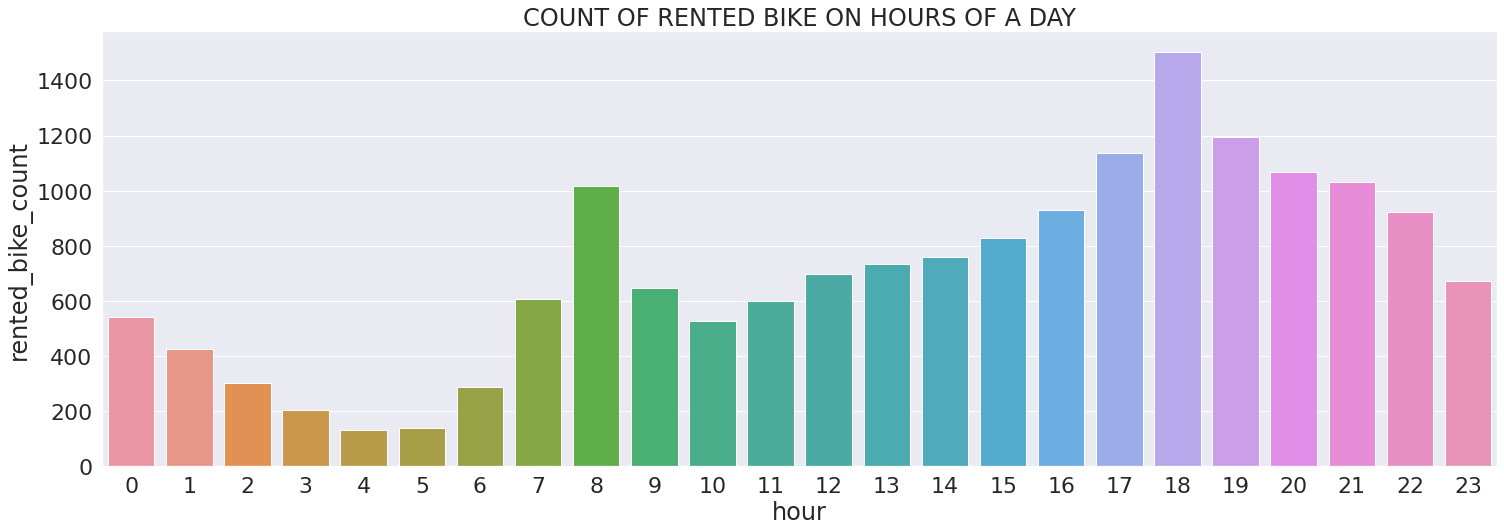

In [242]:
## Plot for 'hour' vs 'rented_bike_count'
sns.set(font_scale = 2)
fig,ax=plt.subplots(figsize=(25,8))
sns.barplot(data=df_Rbike,x='hour',y='rented_bike_count',ci=None,ax=ax,capsize=.2)
ax.set(title='COUNT OF RENTED BIKE ON HOURS OF A DAY')

* **Observations:**  

  1. In the above plot which shows the use of rented bike in accordance with the hours.
  2. In general people used rented bikes during their commuting hours i.e from 7am to 9am in morning and 5pm to 7pm in the evening.



[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ON WEEKENDS AND WEEKDAYS')]

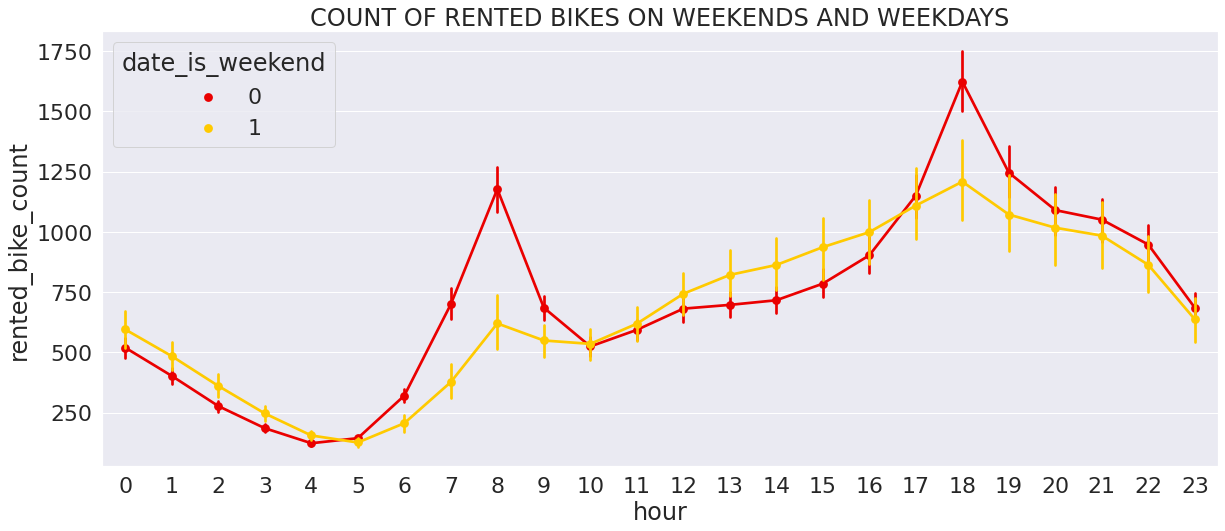

In [243]:
#here we look at the rented bikes count hourly on weeekday as well as weekends:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df_Rbike,x='hour',y='rented_bike_count',hue='date_is_weekend',ax=ax,palette='hot')
ax.set(title='COUNT OF RENTED BIKES ON WEEKENDS AND WEEKDAYS')

0-Weekday 1-Weekend

* **Observations:** 


  1.   From the above plot we can analyse that in the week days which represent in red colour show that the demand of the bike higher because of the office.
  2.  Peak Time are 7 am to 9 am and 5 pm to 7 pm and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly high but shows the decreasing trend and that is due obvious reasons.






[Text(0.5, 1.0, 'HOURLY COUNT OF RENTED BIKE ON HOLIDAY AND NO-HOLIDAY')]

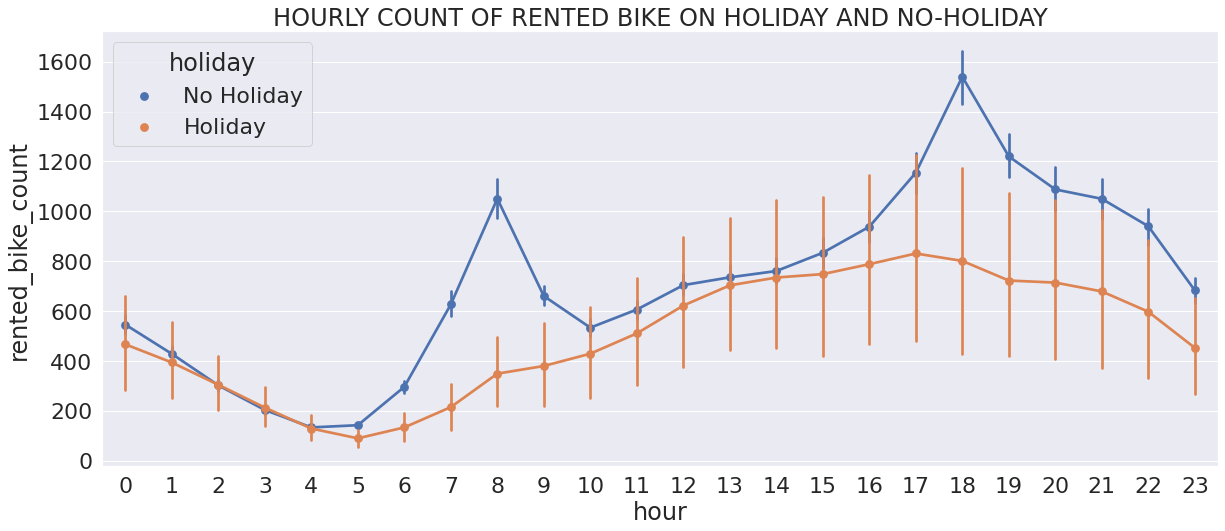

In [244]:
#here we look at the rented bikes count hourly on holidays and no-holiday 
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df_Rbike,x='hour',y='rented_bike_count',hue='holiday')
ax.set(title='HOURLY COUNT OF RENTED BIKE ON HOLIDAY AND NO-HOLIDAY')

* **Observations**:
  1. From the above plot we can analyse that on the non holiday days which represent in blue colour show that the demand of the bike higher because of the office.
  2. Whereas on the holidays the rented bikes count is not that low but lesser in comparison to the non-holdays.




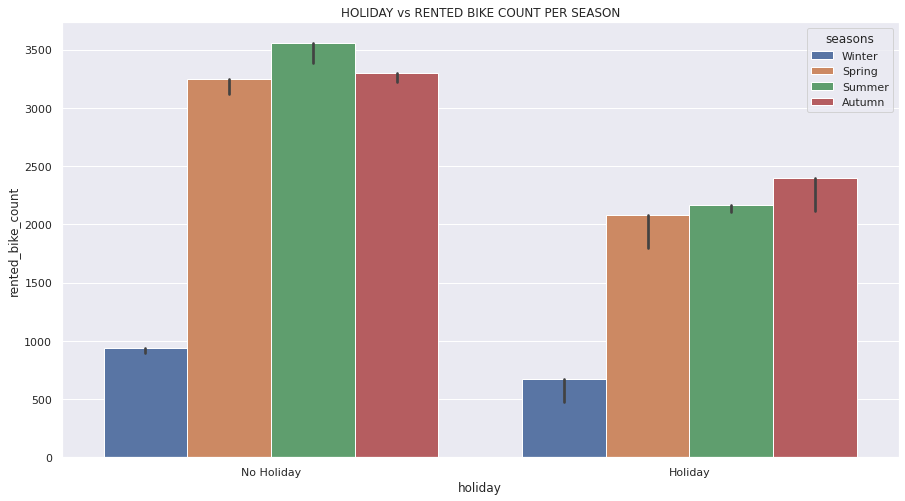

In [245]:
#Barplot for HOLIDAY vs RENTED BIKE COUNT PER SEASON
sns.set(font_scale = 1)
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df_Rbike,x='holiday',y='rented_bike_count',hue='seasons',estimator=max)
ax.set_title('HOLIDAY vs RENTED BIKE COUNT PER SEASON')
plt.show()

* **Observations**:
  1. Here we can observe thet irrespective of the season the rented bikes are more in demand on the non-holiday.
  2. Also on a No-Holiday the demand of bikes is high in the Summer season whereas Autumn Season tops the list on a Holiday 

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES AS PER WEEK DAYS AND WEEKENDS')]

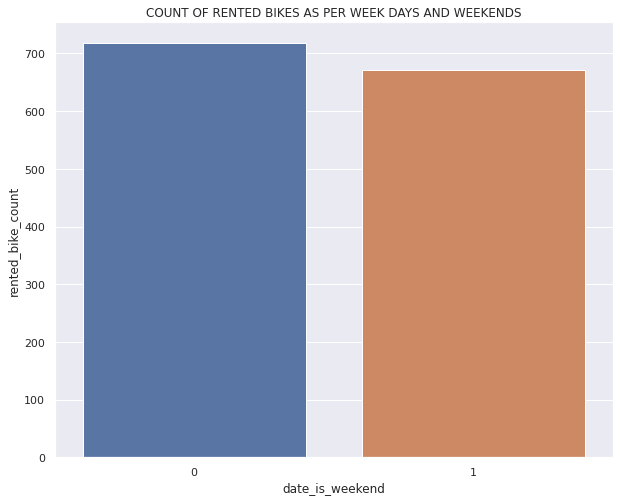

In [246]:
# Visualizing the COUNT OF RENTED BIKES AS PER WEEKDAYS AND WEEKENDS
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_Rbike,x='date_is_weekend',y='rented_bike_count',ci=None,ax=ax)
ax.set(title='COUNT OF RENTED BIKES AS PER WEEK DAYS AND WEEKENDS')

0-Weekday 1-Weekend

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ON HOLIDAY AND NON-HOLIDAY')]

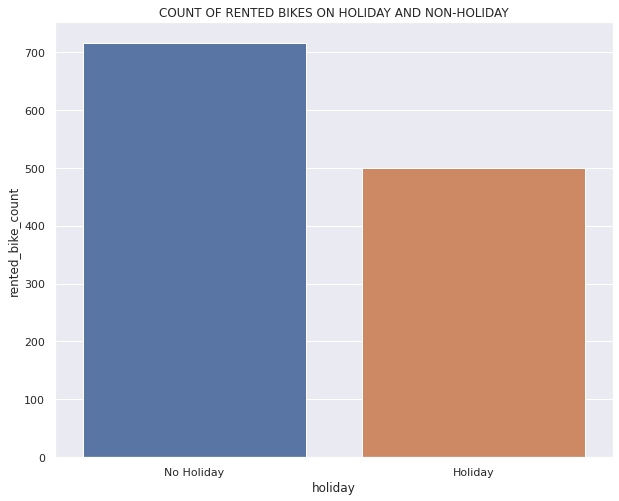

In [247]:
# Visualizing the COUNT OF RENTED BIKES ON HOLIDAY AND NON-HOLIDAY'
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_Rbike,x='holiday',y='rented_bike_count',ci=None,ax=ax,capsize=.2)
ax.set(title='COUNT OF RENTED BIKES ON HOLIDAY AND NON-HOLIDAY')

* **Observations**:
It is clearly observable that the bikes are rented more on a non-holiday rather than Holiday

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES PER SEASON')]

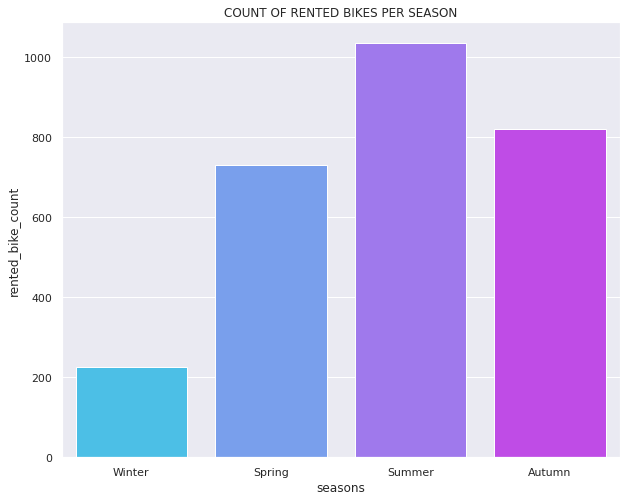

In [248]:
#Analysing the demand of the Rented Bikes per Season
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_Rbike,x='seasons',y='rented_bike_count',ci=None,palette='cool',ax=ax)
ax.set(title='COUNT OF RENTED BIKES PER SEASON')

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES PER HOUR IN DIFFERENT SEASONS')]

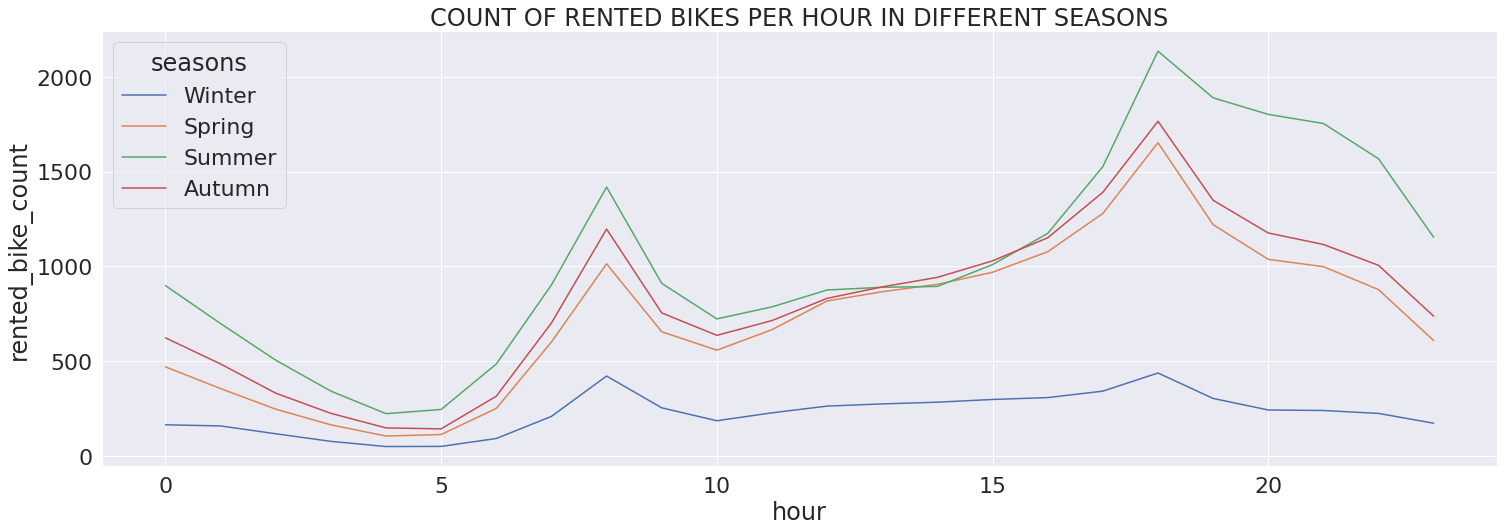

In [249]:
# Looking at how the demand of rented bikes varies per hour in different seasons
sns.set(font_scale = 2)
fig,ax=plt.subplots(figsize=(25,8))
sns.lineplot(data=df_Rbike,x='hour',y='rented_bike_count',hue='seasons',ci=None)
ax.set(title='COUNT OF RENTED BIKES PER HOUR IN DIFFERENT SEASONS')

### Since we have understood the pattern of our categorical variables and got a wholesome understanding of the dataset therefore now we will analyse our numerical features

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES AS PER WEEK DAYS AND WEEKENDS')]

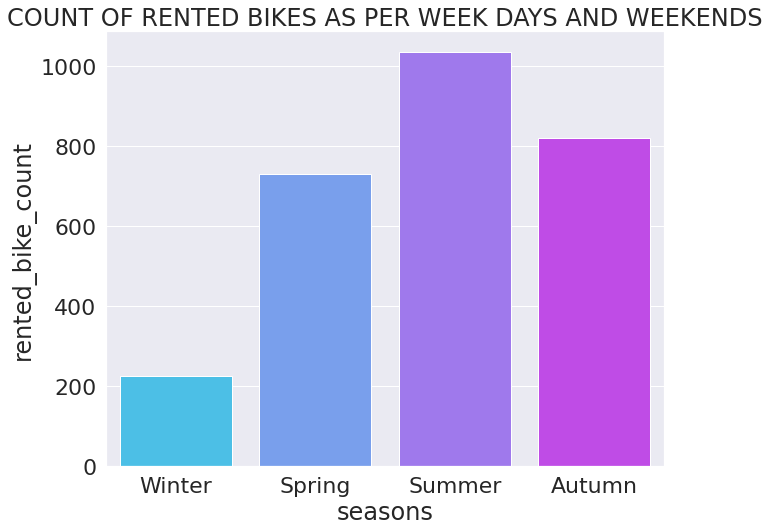

In [250]:
#UNDESTANDING THE DISTRIBUTION OF COUNT OF RENTED BIKES AS PER WEEK DAYS AND WEEKENDS
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_Rbike,x='seasons',y='rented_bike_count',ci=None,palette='cool',ax=ax)
ax.set(title='COUNT OF RENTED BIKES AS PER WEEK DAYS AND WEEKENDS')

[Text(0.5, 1.0, 'COUNT OF RENTED BIKE IN DIFFERENT SEASON')]

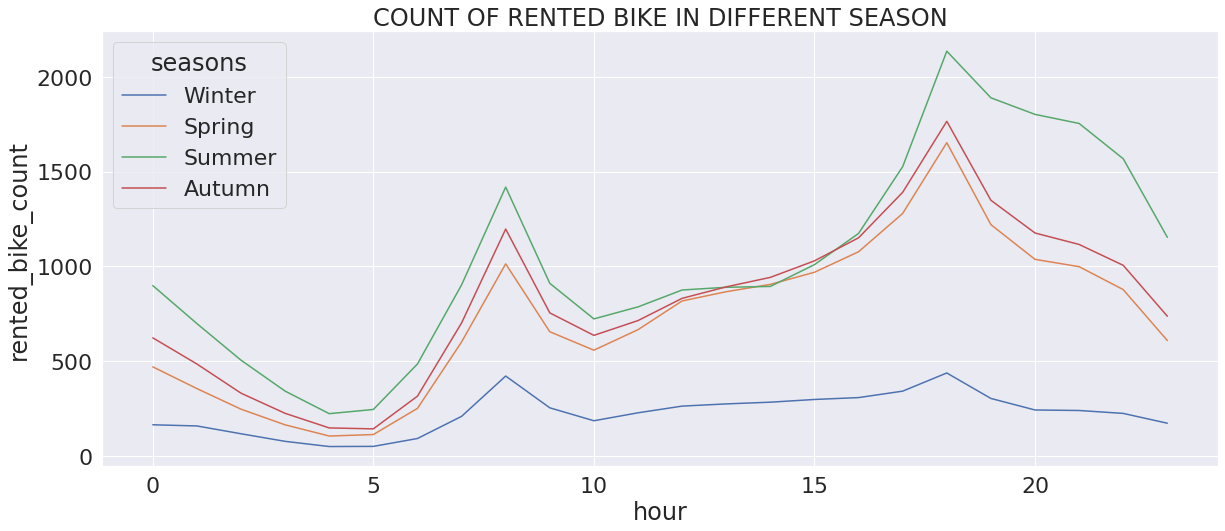

In [251]:
#COUNT OF RENTED BIKE IN DIFFERENT SEASON
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=df_Rbike,x='hour',y='rented_bike_count',hue='seasons',ci=None)
ax.set(title='COUNT OF RENTED BIKE IN DIFFERENT SEASON')

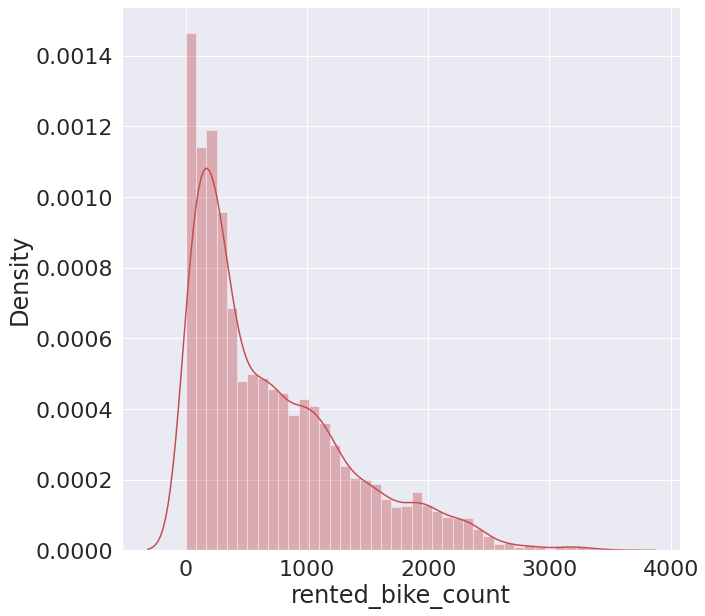

In [252]:
# Understanding the Dependent variable 
plt.figure(figsize=(10,10))
sns.distplot(df_Rbike['rented_bike_count'],color="r")


In [118]:
#listing the numeric features in the dataset available:
numeric_cols=df_Rbike.describe().columns
numeric_cols

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall'],
      dtype='object')

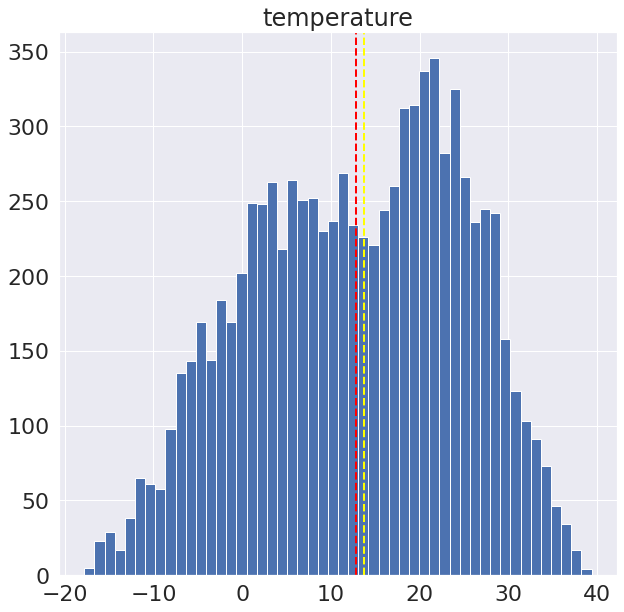

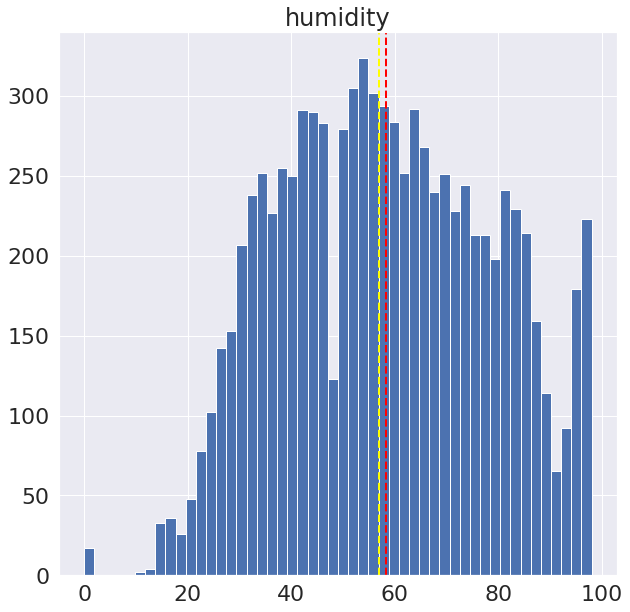

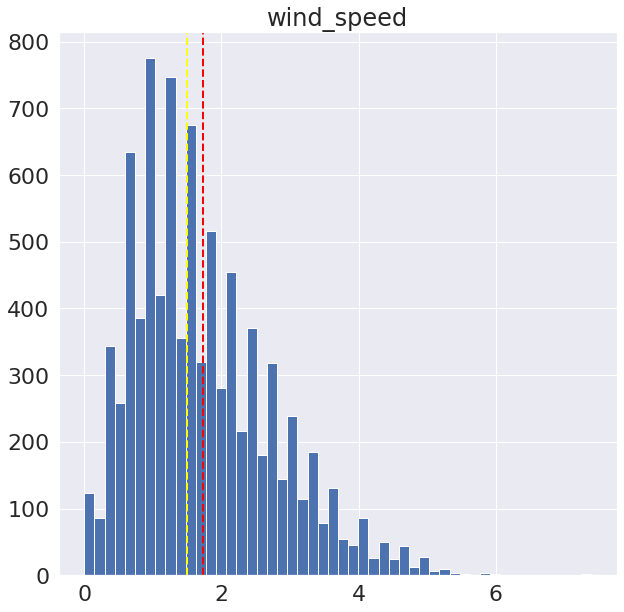

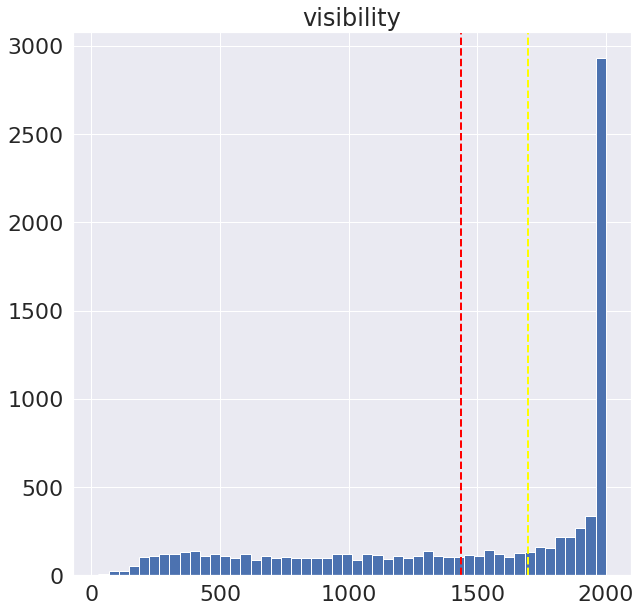

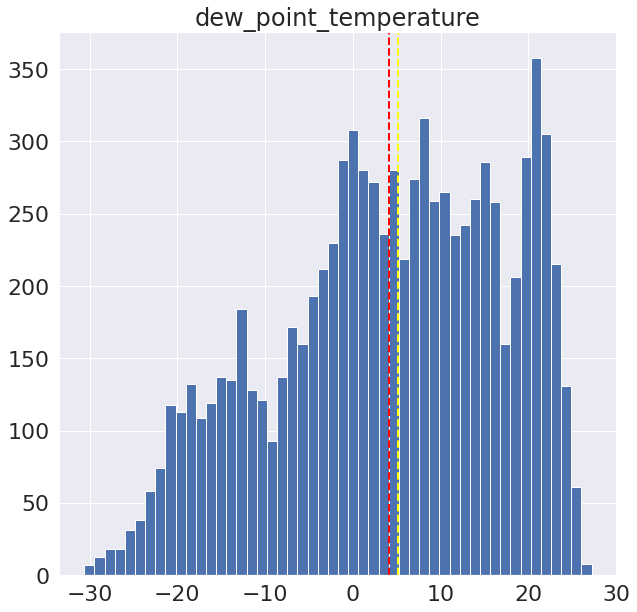

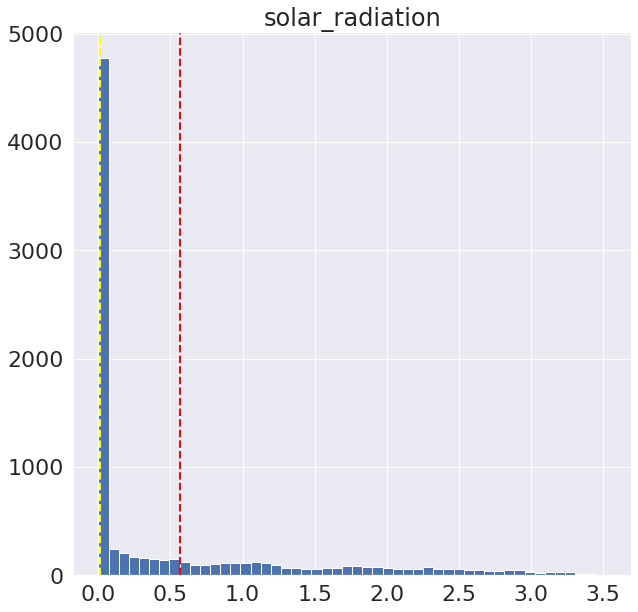

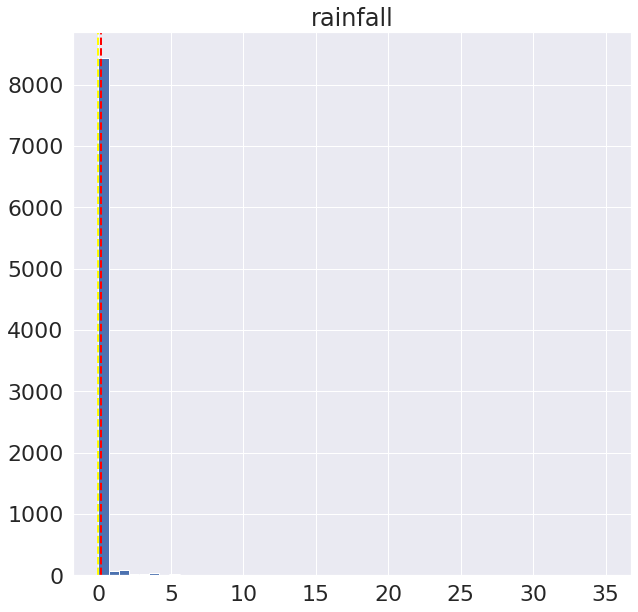

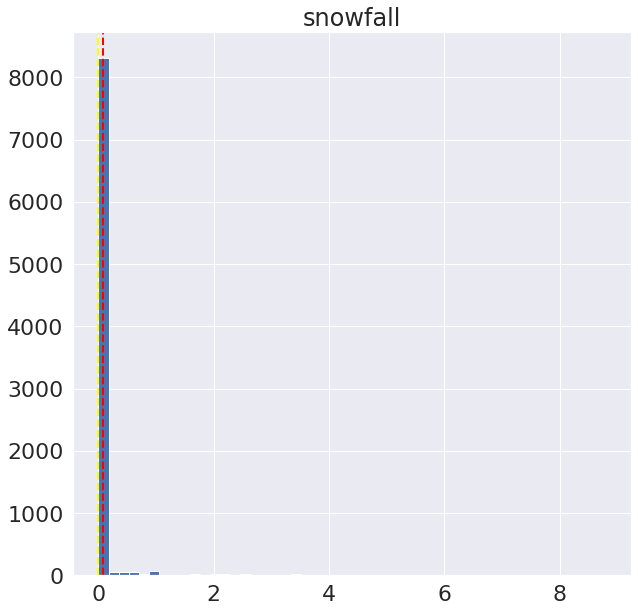

In [253]:
# now we will see the pattern of each numeric column through plot not considering the dependent variable here
for col in numeric_cols[1:]:
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    feature = df_Rbike[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='yellow', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

## **Now we will have look over the correlation between different independent variable with regards to our target variable using a scatter plot.**

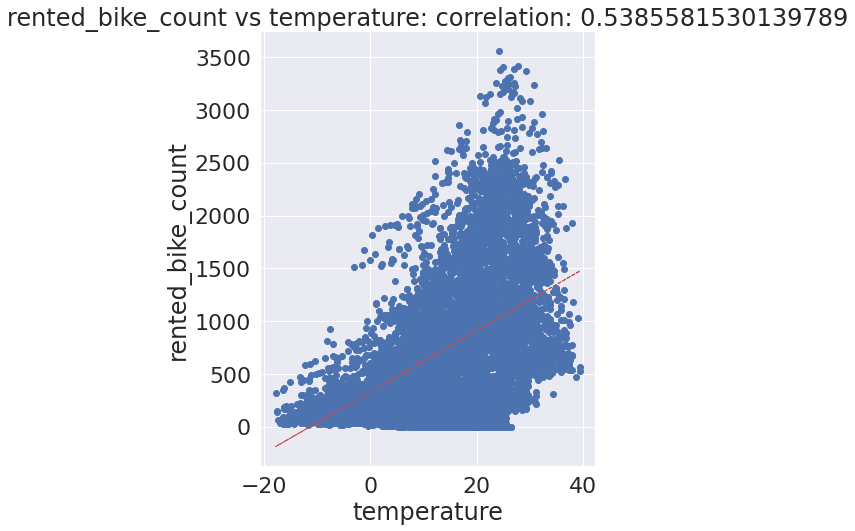

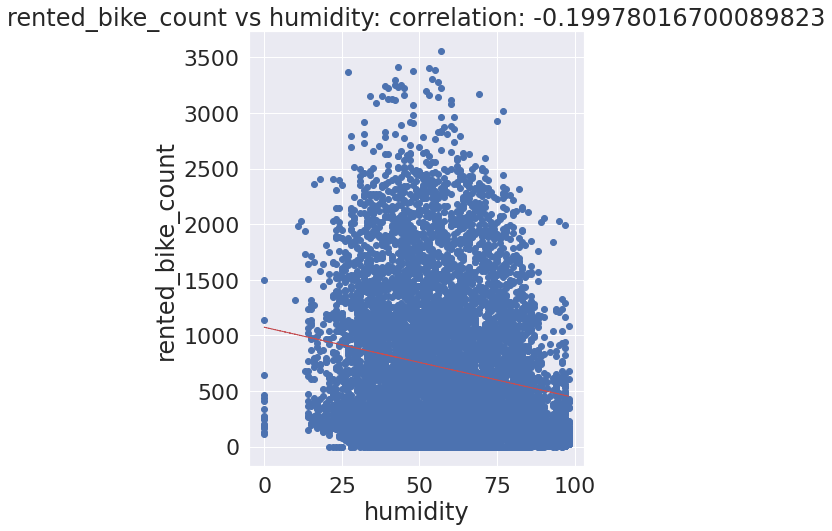

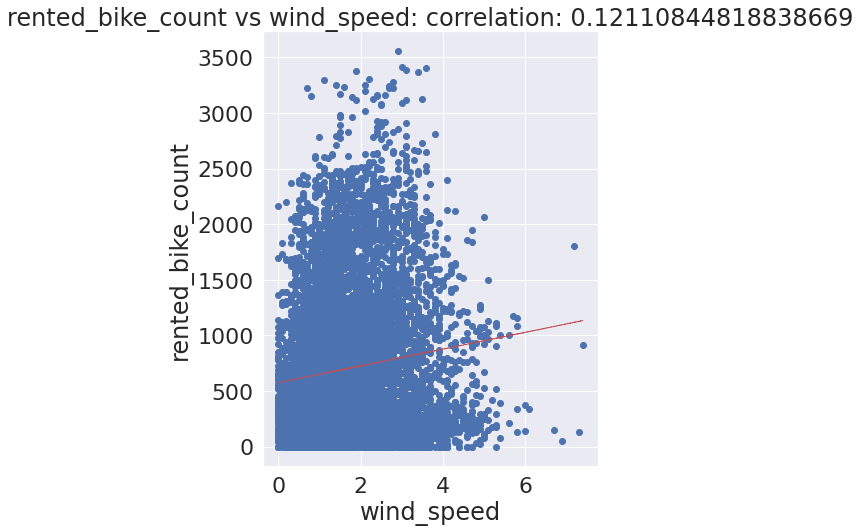

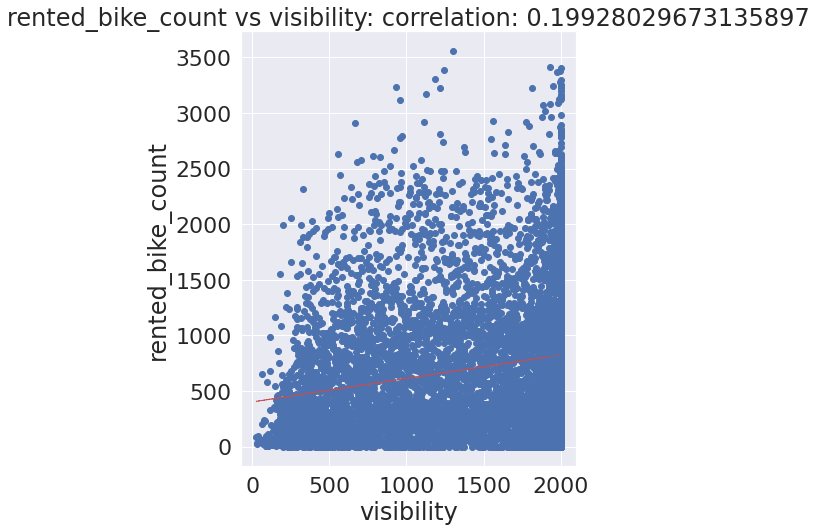

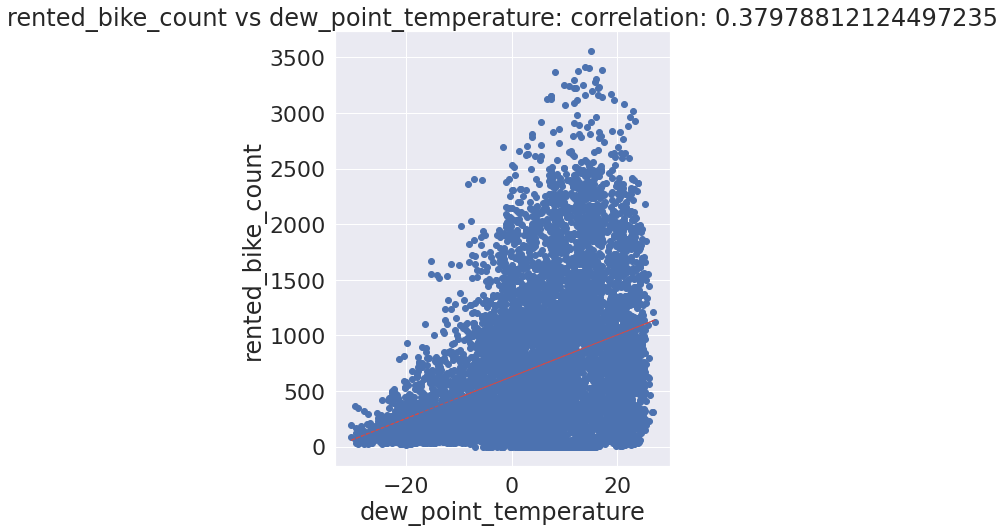

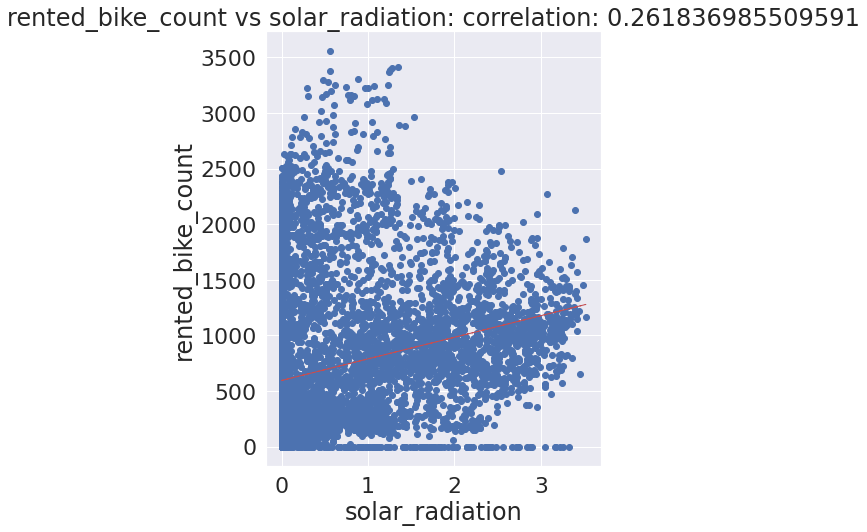

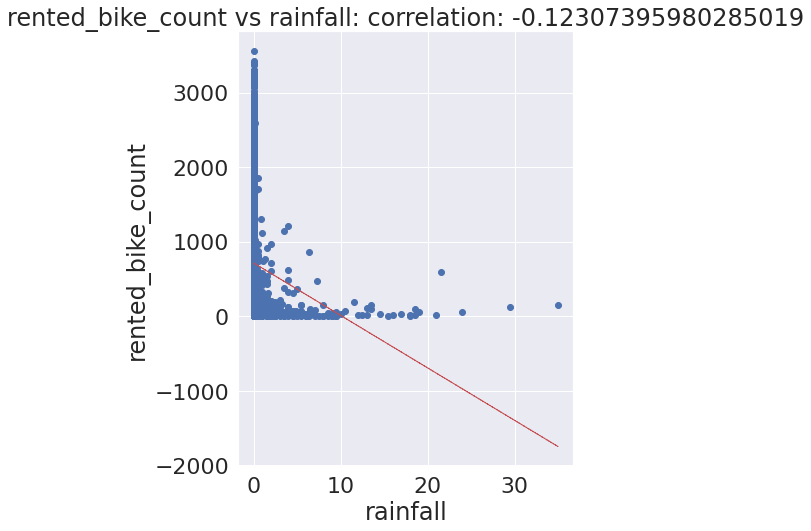

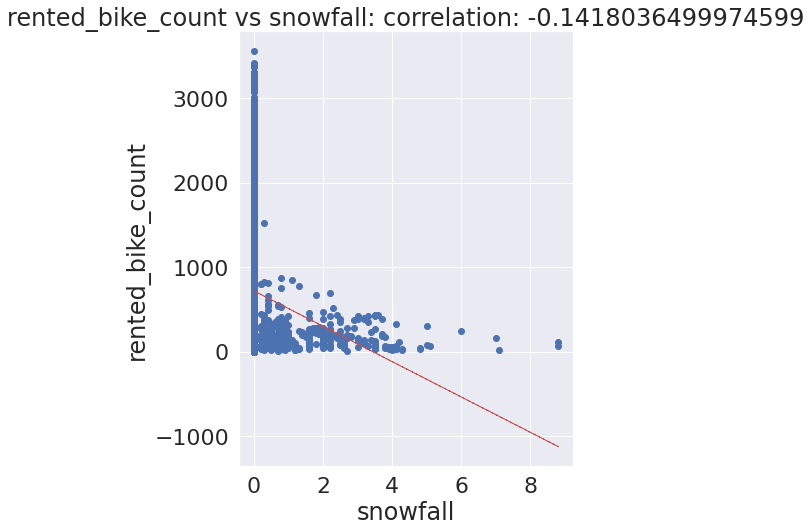

In [254]:
# havig a scatter plot 
for col in numeric_cols[1:]:
    fig = plt.figure(figsize=(6,8))
    ax = fig.gca()
    feature = df_Rbike[col]
    label = df_Rbike['rented_bike_count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('rented_bike_count')
    ax.set_title('rented_bike_count vs ' + col + ': correlation: ' + str(correlation))
    z = np.polyfit(df_Rbike[col], df_Rbike['rented_bike_count'], 1)
    y_hat = np.poly1d(z)(df_Rbike[col])

    plt.plot(df_Rbike[col], y_hat, "r--", lw=1)

plt.show()

From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.
which means the rented bike count increases with increase of these features.
'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

In [257]:
## we can check for skewness by using the following method also.
df_Rbike.skew(axis = 0)

rented_bike_count         1.153428
hour                      0.000000
temperature              -0.198326
humidity                  0.059579
wind_speed                0.890955
visibility               -0.701786
dew_point_temperature    -0.367298
solar_radiation           1.504040
rainfall                 14.533232
snowfall                  8.440801
month                    -0.010458
date_is_weekend           0.923555
dtype: float64

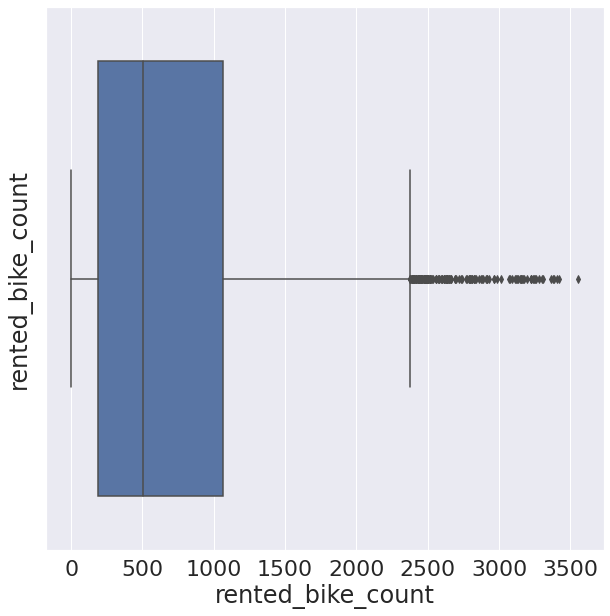

In [256]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,10))
plt.ylabel('rented_bike_count')
sns.boxplot(x=df_Rbike['rented_bike_count'])
plt.show()

Since we have seen that the Rented_Bike_count doesnot follow the normal distrbution and somewhat skewed towards the right therefore as per the assumption of linear regression we must transform the feature to normal form there are numerous way to do that but we will using square root method,it is the one that has been proven to be applied to feature havig positive value and also the right skewed. 

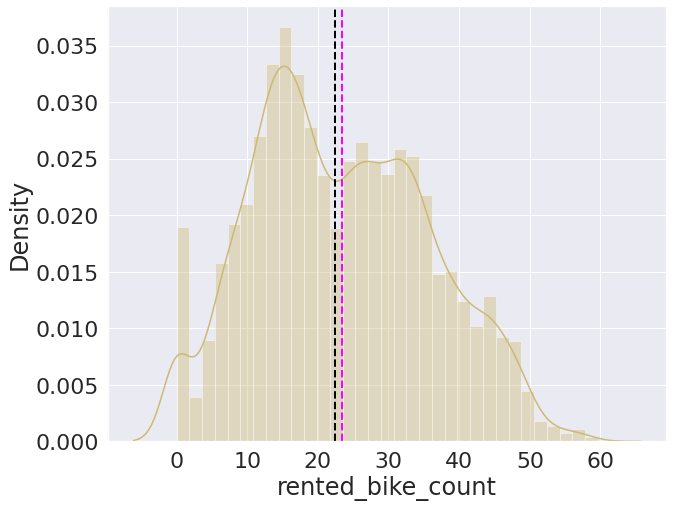

In [258]:
#Applying square root method to normalise Rented Bike Count
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df_Rbike['rented_bike_count']), color="y")
ax.axvline(np.sqrt(df_Rbike['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df_Rbike['rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

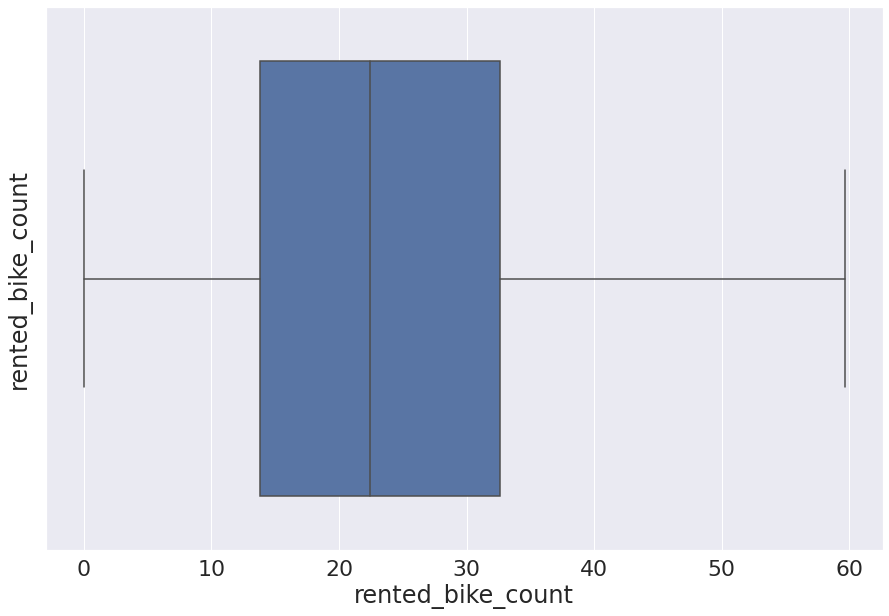

In [259]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(15,10))
plt.ylabel('rented_bike_count')
sns.boxplot(x=np.sqrt(df_Rbike['rented_bike_count']))
plt.show()

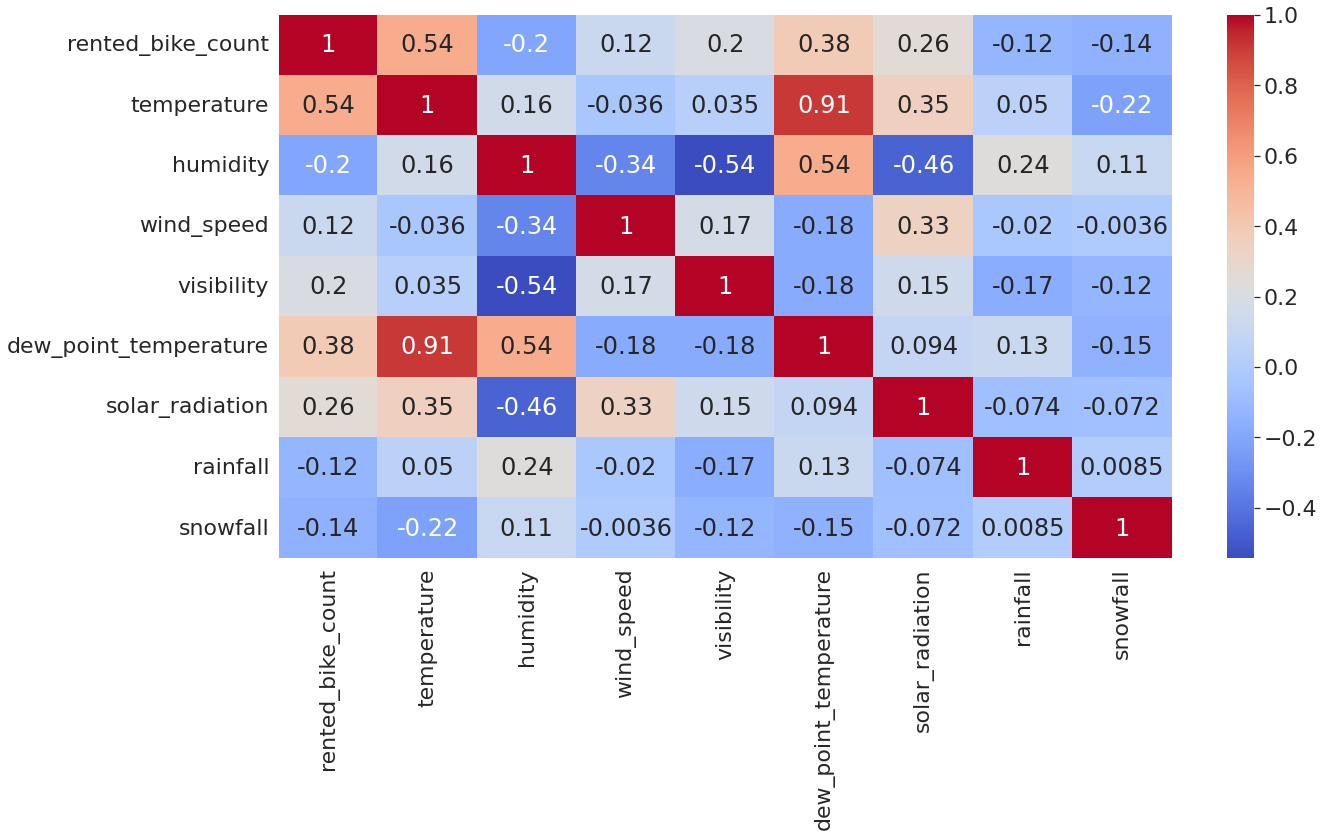

In [260]:
# having a summary of correlaton using heat map
plt.figure(figsize=(20,10))
correlation = df_Rbike.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

## **As we are also aware that multi-collinearity is one of those importnt factor that can mar the accuracy of our model therefore we will be checking for it and try to minimise it**

## Variance inflation factor(VIF) detects multicollinearity.A rule of thumb for interpreting the VIF:


* **Variance inflation factor**


1.   1 = not correlated
2.   Between 1 and 5 = moderately correlated
3.   Greater than 5 = highly correlated.



In [261]:
#Multicollinearity


from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [262]:
calc_vif(df_Rbike[[i for i in df_Rbike.describe().columns]])

variables        VIF
0      rented_bike_count   3.617343
1            temperature  34.564747
2               humidity   5.092372
3             wind_speed   4.566498
4             visibility   9.055760
5  dew_point_temperature  16.039388
6        solar_radiation   2.886574
7               rainfall   1.096052
8               snowfall   1.119773

## From the heat map we can see that the dew point temperature and temperature are highly correlated to each other causing the issue of multi collinearity henge we need to either of them dropped  and correlation of temperature with our target variable is high therefore we can drop dew point temperature and we will then again check for VIF.

In [263]:
#drop the Dew point temperature column
df_Rbike=df_Rbike.drop(['dew_point_temperature'],axis=1)

In [265]:
# Again we check for VIF
calc_vif(df_Rbike[[i for i in df_Rbike.describe().columns]])

variables       VIF
0  rented_bike_count  3.428485
1        temperature  4.415463
2           humidity  4.833669
3         wind_speed  4.214112
4         visibility  4.714768
5    solar_radiation  2.251838
6           rainfall  1.095993
7           snowfall  1.119709

## Therefore now we can say that VIF of all the numerical now comes down below 5.

In [266]:
df_Rbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  8760 non-null   int64  
 1   hour               8760 non-null   object 
 2   temperature        8760 non-null   float64
 3   humidity           8760 non-null   int64  
 4   wind_speed         8760 non-null   float64
 5   visibility         8760 non-null   int64  
 6   solar_radiation    8760 non-null   float64
 7   rainfall           8760 non-null   float64
 8   snowfall           8760 non-null   float64
 9   seasons            8760 non-null   object 
 10  holiday            8760 non-null   object 
 11  functioning_day    8760 non-null   object 
 12  month              8760 non-null   object 
 13  date_is_weekend    8760 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 958.2+ KB


In [267]:
## Sorting the categorical columns out of our dataset:
c_features=list(df_Rbike.select_dtypes(['object']).columns)
c_features

['hour', 'seasons', 'holiday', 'functioning_day', 'month', 'date_is_weekend']

In [268]:
# Now we apply One Hot Encoding to the above categorical features.
# Creating new data frame to maintain the integrity of our original one
ohe_df=df_Rbike
def ohe(data,col):
    data = pd.concat([data, pd.get_dummies(data[col], prefix=col, drop_first=True)], axis=1)
    data = data.drop([col], axis=1)
    return data

for col in c_features:
    ohe_df =ohe(ohe_df, col)
ohe_df.head() 

rented_bike_count  temperature  humidity  wind_speed  visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   solar_radiation  rainfall  snowfall  hour_1  hour_2  ...  month_4  month_5  \
0              0.0       0.0       0.0       0       0  ...        0        0   
1              0.0       0.0       0.0       1       0  ...        0        0   
2              0.0       0.0       0.0       0       1  ...        0        0   
3              0.0       0.0       0.0       0       0  ...        0        0   
4              0.0       0.0       0.0       0       0  ...        0        0   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
0        0        0        0        0         0         0         0   
1        0        0        0        0         0         0         0   
2        0        0        0        0         0         0         0   
3        0        0        0        0         0         0         0   
4        0        0        0        0         0         0         0   

   date_is_weekend_1  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 48 columns]

In [269]:
## Now we will standardise our those numerical variables that posses some skewness to get ideal results from our model
ohe_cp=ohe_df.drop('rented_bike_count', axis=1)[['temperature','humidity','wind_speed','visibility','solar_radiation','rainfall','snowfall']]

In [270]:
# Creating the instance of the class Standard Scaler
scaler = StandardScaler()

# # fit the scaler to the train set, it will learn the parameters
scaler.fit(ohe_cp)

# # transform train and test sets
scaled = scaler.transform(ohe_cp)

In [271]:
## Creating the dataframe of the new values
scaled = pd.DataFrame(scaled, columns=ohe_cp.columns)
scaled

temperature  humidity  wind_speed  visibility  solar_radiation  \
0       -1.513957 -1.042483    0.458476    0.925871        -0.655132   
1       -1.539074 -0.993370   -0.892561    0.925871        -0.655132   
2       -1.580936 -0.944257   -0.699556    0.925871        -0.655132   
3       -1.597680 -0.895144   -0.796059    0.925871        -0.655132   
4       -1.580936 -1.091596    0.554978    0.925871        -0.655132   
...           ...       ...         ...         ...              ...   
8755    -0.726961 -1.189822    0.844486    0.751605        -0.655132   
8756    -0.793939 -1.042483    0.554978    0.925871        -0.655132   
8757    -0.860918 -0.944257   -1.375075    0.873263        -0.655132   
8758    -0.902779 -0.846031   -0.699556    0.694064        -0.655132   
8759    -0.919524 -0.747806   -0.410048    0.776265        -0.655132   

      rainfall  snowfall  
0      -0.1318 -0.171891  
1      -0.1318 -0.171891  
2      -0.1318 -0.171891  
3      -0.1318 -0.171891  
4      -0.1318 -0.171891  
...        ...       ...  
8755   -0.1318 -0.171891  
8756   -0.1318 -0.171891  
8757   -0.1318 -0.171891  
8758   -0.1318 -0.171891  
8759   -0.1318 -0.171891  

[8760 rows x 7 columns]

In [272]:
# Dropping the old variables 
ohe_df=ohe_df.drop(['temperature','humidity','wind_speed','visibility','solar_radiation','rainfall','snowfall'],axis=1)

In [273]:
# Concatinating our datframes to get the final dataframe 
ohe_df = pd.concat([scaled, ohe_df], axis=1)

In [274]:
#Lookinf at the dataframe 
ohe_df.head()

temperature  humidity  wind_speed  visibility  solar_radiation  rainfall  \
0    -1.513957 -1.042483    0.458476    0.925871        -0.655132   -0.1318   
1    -1.539074 -0.993370   -0.892561    0.925871        -0.655132   -0.1318   
2    -1.580936 -0.944257   -0.699556    0.925871        -0.655132   -0.1318   
3    -1.597680 -0.895144   -0.796059    0.925871        -0.655132   -0.1318   
4    -1.580936 -1.091596    0.554978    0.925871        -0.655132   -0.1318   

   snowfall  rented_bike_count  hour_1  hour_2  ...  month_4  month_5  \
0 -0.171891                254       0       0  ...        0        0   
1 -0.171891                204       1       0  ...        0        0   
2 -0.171891                173       0       1  ...        0        0   
3 -0.171891                107       0       0  ...        0        0   
4 -0.171891                 78       0       0  ...        0        0   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
0        0        0        0        0         0         0         0   
1        0        0        0        0         0         0         0   
2        0        0        0        0         0         0         0   
3        0        0        0        0         0         0         0   
4        0        0        0        0         0         0         0   

   date_is_weekend_1  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 48 columns]

# **Train Test split for regression**

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.



* **Train Dataset**: Used to fit the machine learning model.
* **Test Dataset**: Used to evaluate the fit machine learning model

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

The train-test procedure is appropriate when there is a sufficiently large dataset available.

In [275]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(ohe_df.drop('rented_bike_count', axis=1),np.sqrt(ohe_df['rented_bike_count']),test_size=0.3,random_state=10)
                                                    

In [276]:
#Shape of the test and train data
X_train.shape, X_test.shape

((6132, 47), (2628, 47))

# **Linear Regression**

In [277]:
# Creating the instance of the class Linear Rgression
lr= LinearRegression()

# Fit the model to the train dataset
lr.fit(X_train, y_train)

LinearRegression()

In [278]:
#check the score
lr.score(X_train, y_train)

0.7548144651946441

In [279]:
#check the coefficeint
lr.coef_

array([ 5.54044079, -2.78419722, -0.03940836,  0.24599665,  0.96271858,
       -1.73564666,  0.08178627, -1.82984396, -4.56626806, -7.28225054,
       -9.81681727, -9.41972112, -4.68931779,  1.71535675,  7.44966424,
        0.59061072, -3.79733993, -4.17807107, -3.19684233, -3.48579868,
       -3.19603536, -2.01490941, -0.52870479,  3.66694542,  9.69229714,
        6.98914462,  6.25292656,  6.5197562 ,  5.15256731,  1.68666842,
       -3.19542761, -3.34995611, -7.16812287,  2.51264554, 28.16937853,
       -0.87150901,  0.48379211,  0.28574017,  1.86251478,  4.0392404 ,
       -0.12682927, -0.64510896,  0.16351549,  2.0966077 ,  0.66360544,
        1.2730033 , -0.6782699 ])

In [280]:
## in order to calculate the metrics we need:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

In [281]:
# Getting the metrics to validate the model
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)



#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 35.84313542406726
RMSE : 5.986913681026916
MAE : 4.64252698237592
R2 : 0.7682600498757427
Adjusted R2 : 0.7640384306292931


The r2_score for the test set is 0.7682. This means our linear model is somewhhat performing well on the data.

In [282]:
# We will store these metrics to compare at last
dict_lr={'Model':'Linear regression',
       'MSE':MSE_lr,
       'RMSE':RMSE_lr,
       'MAE':MAE_lr,
       'R2_score':r2_lr,
       'Adjusted R2':Adjusted_R2_lr}
metrics_df=pd.DataFrame(dict_lr,index=[1])

In [283]:
# Checking the hetroscadeasticity
residuals = y_test-y_pred_test
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.05504355163945971


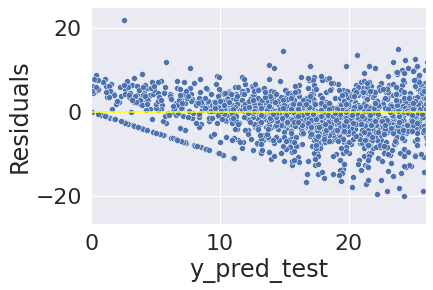

In [284]:
p = sns.scatterplot(y_pred_test,residuals)
plt.xlabel('y_pred_test')
plt.ylabel('Residuals')
# plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='yellow')

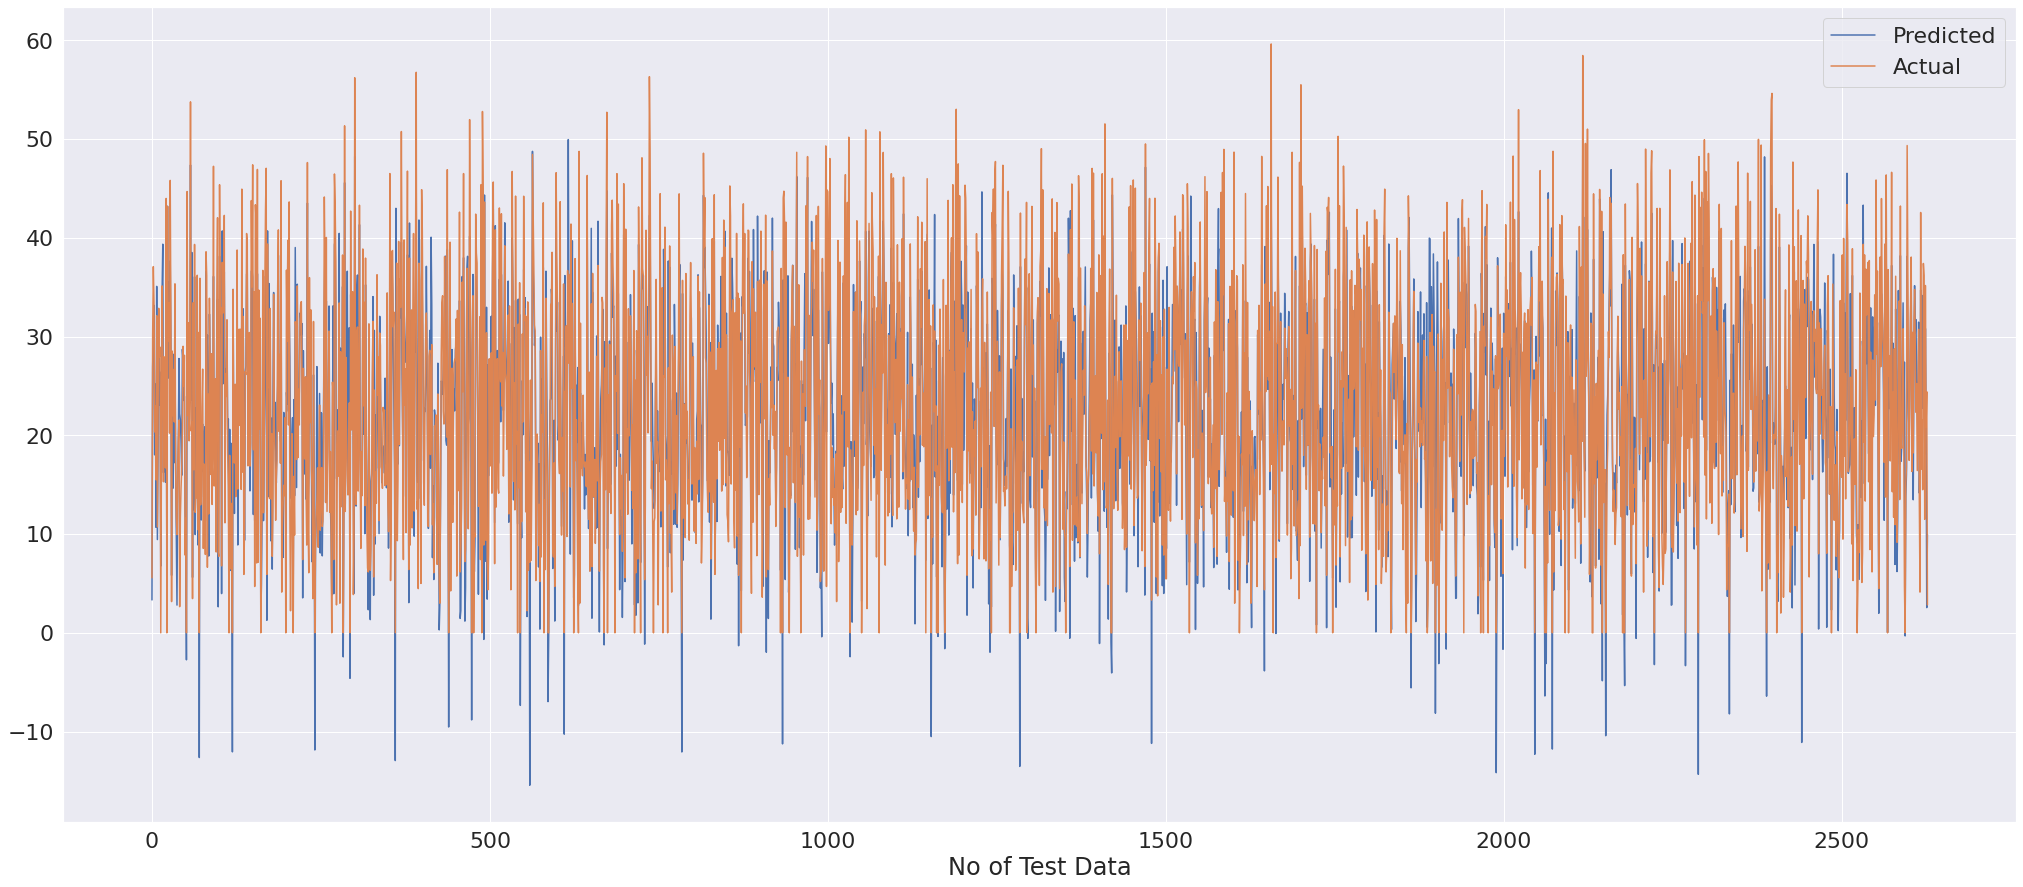

In [285]:
#plot the compasion plot
plt.figure(figsize=(35,15))
plt.plot((y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Ridge Regression**

In [286]:
# calling the instance of the class ridge
rid= Ridge(alpha=0.3)

In [287]:
#Fit The Regressor Model
rid.fit(X_train,y_train)

Ridge(alpha=0.3)

In [288]:
#get the X_train and X-test value

y_pred_ridge=rid.predict(X_test)

In [289]:
# Getting the metrics to validate the model
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_ridge)
print("MAE :",MAE_r)



#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.84205694276091
RMSE : 5.986823610459967
MAE : 4.642668327542807
R2 : 0.7682670226810284
Adjusted R2 : 0.7640455304585511


In [290]:
# We will store these metrics to compare at last
dict_ridge={'Model':'Ridge regression ',
           'MAE':round(MAE_r),
           'MSE':round(MSE_r),
           'RMSE':round(RMSE_r),
           'R2_score':round(r2_r),
           'Adjusted R2':round(Adjusted_R2_r )}
metrics_df=metrics_df.append(dict_ridge,ignore_index=True)

Mean of Residuals 0.05504355163945971


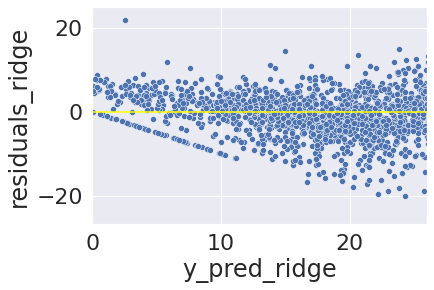

In [291]:
## hetroscadeasticity
residuals_ridge = y_test-y_pred_ridge
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))


p = sns.scatterplot(y_pred_ridge,residuals)
plt.xlabel('y_pred_ridge')
plt.ylabel('residuals_ridge')
# plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='yellow')

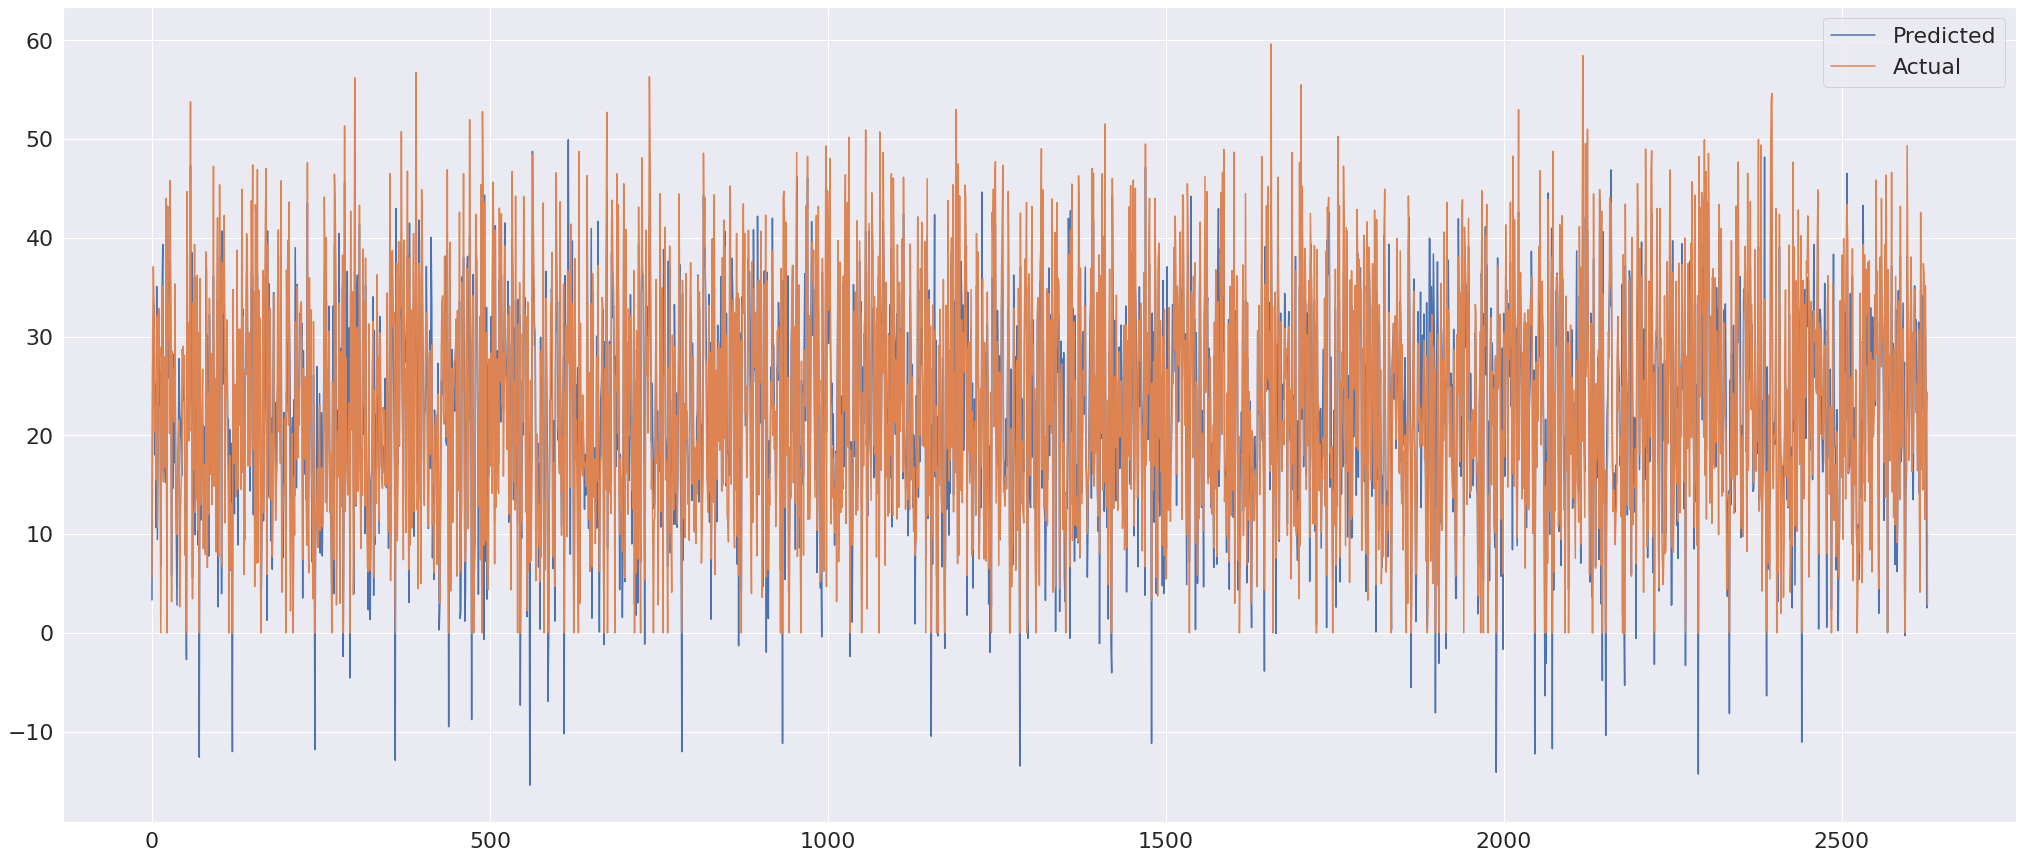

In [292]:
#plot the compasion plot
plt.figure(figsize=(35,15))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **LASSO REGRESSION**

In [293]:
# Applyig the lasso Regression for the analysis
lasso = Lasso(alpha=0.3, max_iter=3500)

# Fit data in  Lasso model
lasso.fit(X_train, y_train)



Lasso(alpha=0.3, max_iter=3500)

In [294]:
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))


0.5733616037078171 0.5689939235895545


In [295]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_lasso=lasso.predict(X_test)

In [296]:
# Getting the metrics to validate the model
#calculate MSE
MSE_ls=mean_squared_error(y_test, y_pred_lasso)
print("MSE :",MSE_ls)

#calculate RMSE
RMSE_ls=np.sqrt(MSE_ls)
print("RMSE :",RMSE_ls)


#calculate MAE
MAE_ls= mean_absolute_error(y_test, y_pred_lasso)
print("MAE :",MAE_ls)



#calculate r2 and adjusted r2
r2_ls= r2_score((y_test), (y_pred_lasso))
print("R2 :",r2_ls)
Adjusted_R2_ls=(1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 65.98800857257498
RMSE : 8.123300349770098
MAE : 6.390762998049111
R2 : 0.5733616037078171
Adjusted R2 : 0.5655895088916417


In [297]:
# We will store these metrics to compare at last
dict_lasso={'Model':'Lasso regression ',
       'MAE':round((MAE_ls),3),
       'MSE':round((MSE_ls),3),
       'RMSE':round((RMSE_ls),3),
       'R2_score':round((r2_ls),3),
       'Adjusted R2':round((Adjusted_R2_ls ),2)
       }
metrics_df=metrics_df.append(dict_lasso,ignore_index=True)

In [298]:
d_3= pd.DataFrame(dict_lasso,index=[1])
d_3

Model    MAE     MSE   RMSE  R2_score  Adjusted R2
1  Lasso regression   6.391  65.988  8.123     0.573         0.57

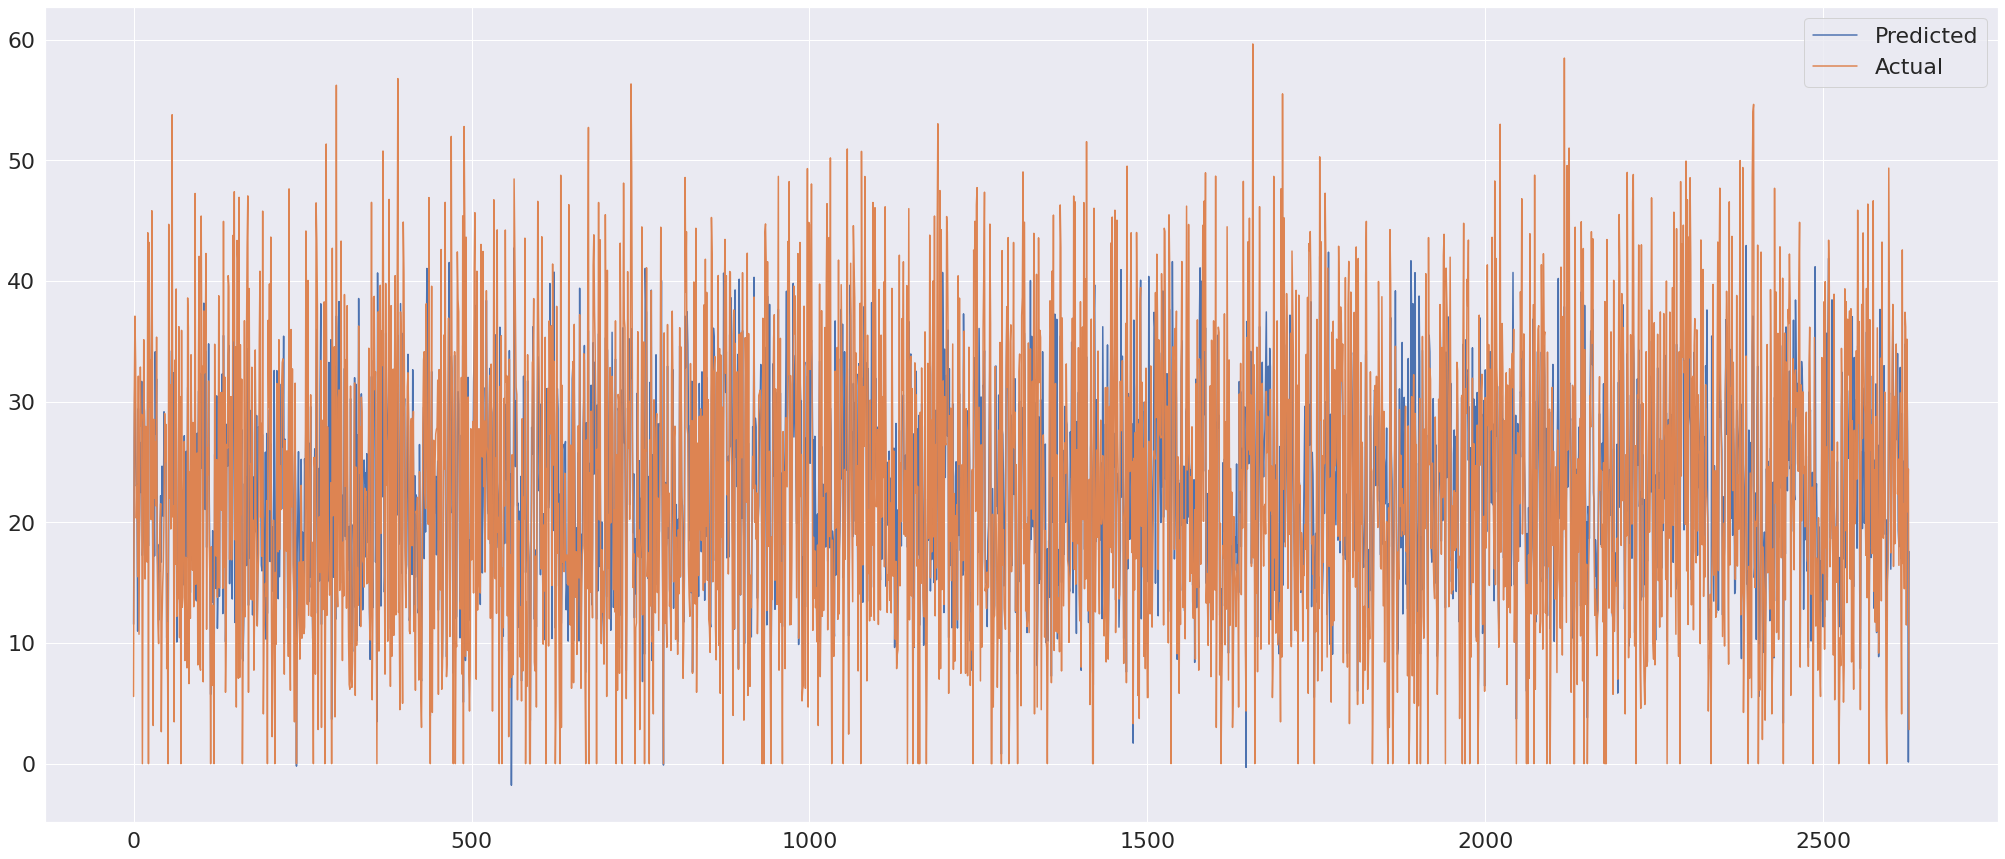

In [299]:
#plot the compasion plot
plt.figure(figsize=(35,15))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **DECISION TREE**

In [300]:
# Apllying the Decision Tree model on our data 
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_test_d = decision_regressor.predict(X_test)

In [301]:
# Getting the metrics to validate the model
#calculate MSE
MSE_d= mean_squared_error(y_test, y_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_test_d)
print("MAE :",MAE_d)



#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 83.0520285301957
RMSE : 9.113288568359707
MAE : 6.391897489710327
R2 : 0.4630360117328717
Adjusted R2 : 0.45325410962102874


In [302]:
dict_dt={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
metrics_df=metrics_df.append(dict_dt,ignore_index=True)

In [303]:
d_4= pd.DataFrame(dict_dt,index=[1])
d_4

Model    MAE     MSE   RMSE  R2_score  Adjusted R2
1  Dicision tree regression   6.392  83.052  9.113     0.463         0.45

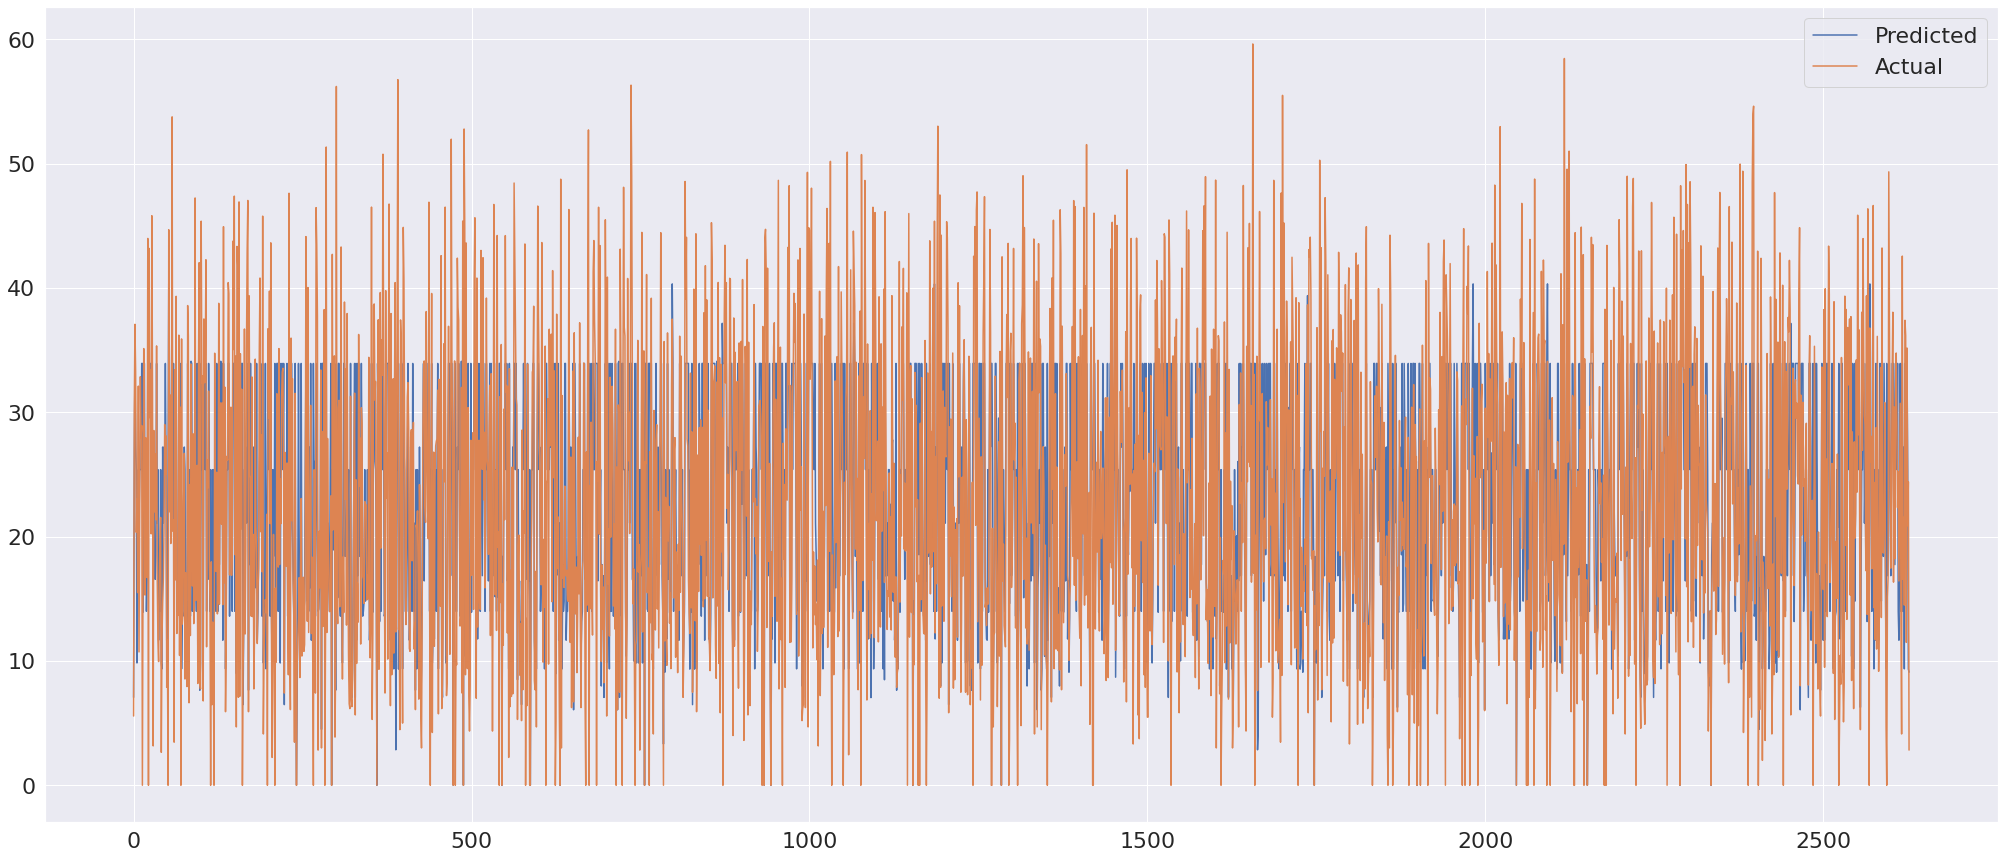

In [304]:
#plot the compasion plot
plt.figure(figsize=(35,15))
plt.plot((np.array(y_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Mean of Residuals 0.05504355163945971


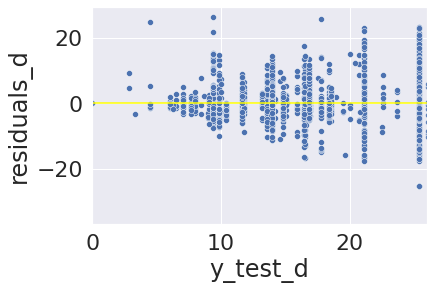

In [305]:
## hetroscadeasticity
residuals_d = y_test-y_test_d
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))


p = sns.scatterplot(y_test_d,residuals_d)
plt.xlabel('y_test_d')
plt.ylabel('residuals_d')
# plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='yellow')

In [306]:
### Feature Importance
X=ohe_df.drop('rented_bike_count', axis=1)
y=ohe_df['rented_bike_count']
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [307]:
# printing the importance paarameter
print(model.feature_importances_)

[0.18184818 0.12134722 0.01101802 0.01236919 0.03531938 0.01722169
 0.00054082 0.0037701  0.0076275  0.01121896 0.01399386 0.0129497
 0.00677385 0.00475497 0.02639314 0.00175403 0.00241135 0.0012832
 0.00065643 0.00045999 0.00067123 0.00275926 0.00733737 0.02379565
 0.07547527 0.03547453 0.02746263 0.02702969 0.02045069 0.00822159
 0.01178261 0.0105905  0.13210493 0.00638883 0.07055564 0.00298603
 0.0061508  0.00418974 0.00460152 0.00597364 0.00402908 0.00413843
 0.00410665 0.00345665 0.00296512 0.0019755  0.02161485]


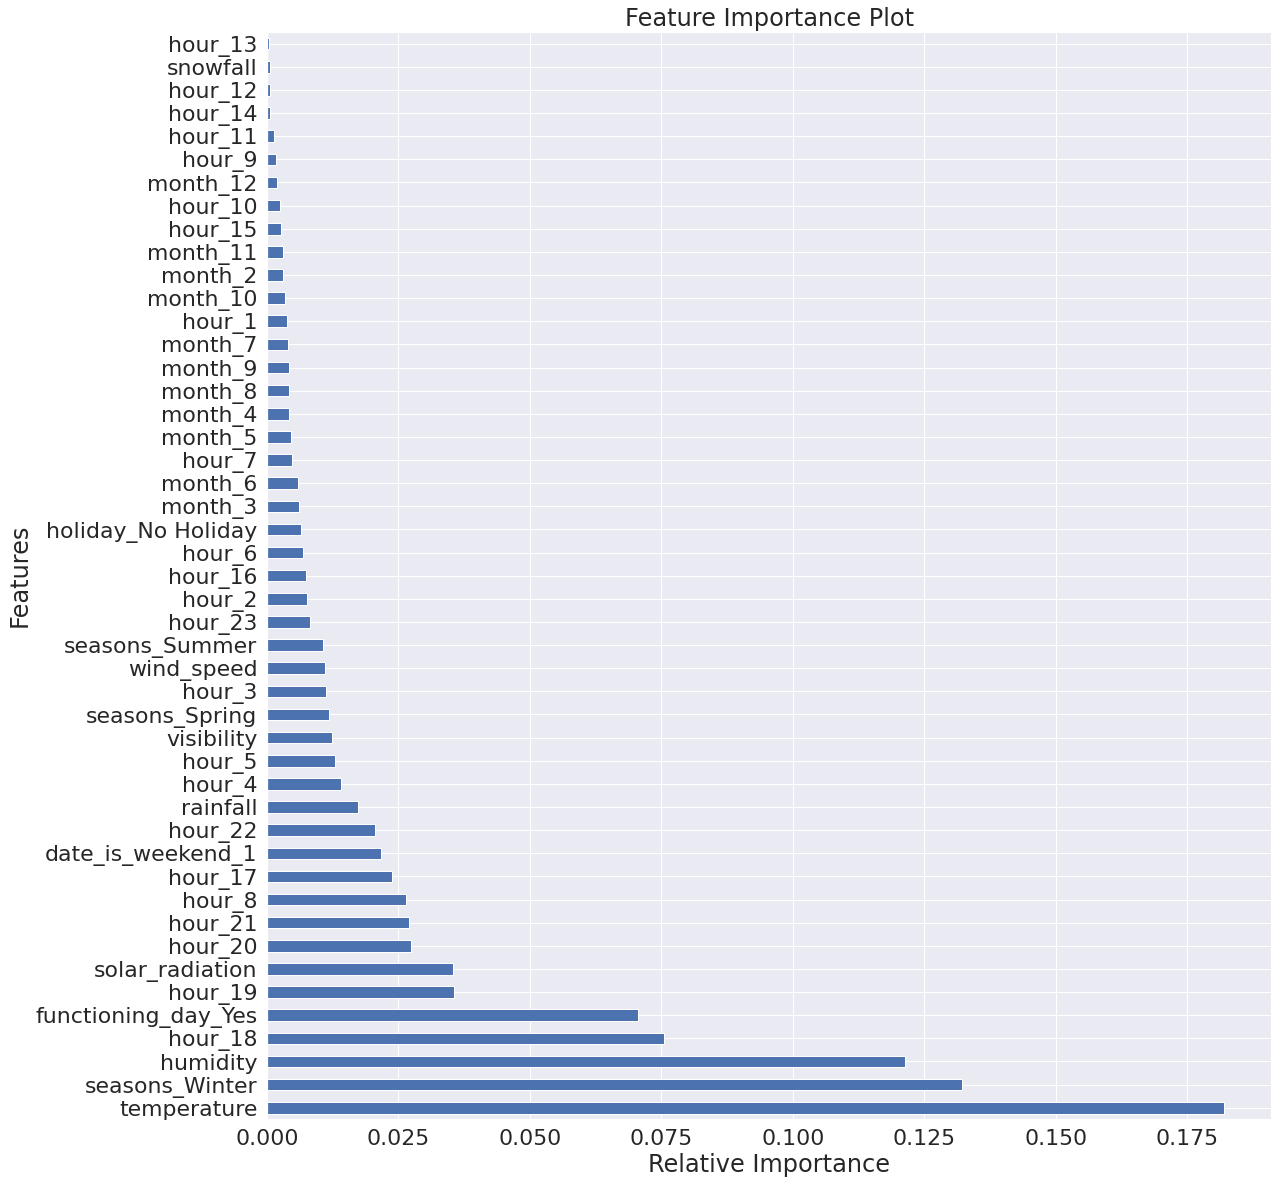

In [308]:
#plot graph of feature importances for better visualization

plt.figure(figsize=(18,20))
plt.title('Feature Importance Plot')
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
feat_importances.nlargest(47).plot(kind='barh',)
plt.show()

### As far as importance of feature is considered Temperature tops the list and the feature that is least apart from those are one hot encoded is snowfall.

## **Random Forest tuning with Randomized Search CV**

In [309]:
## Providing the hyperparameters
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [310]:
# Now we will be creating the random grid
#parameters need to be supplied in the form key-value pairs
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [311]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [312]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42,n_jobs=1)

In [313]:
# Fit in the data in the model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [316]:
# Optimum parameters
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [317]:
y_test_RF=rf_random.predict(X_test)

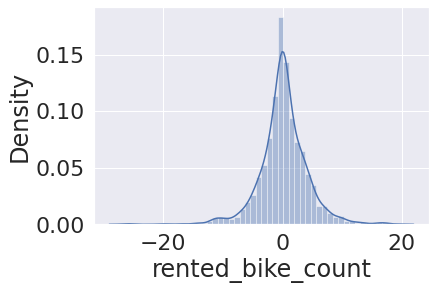

In [326]:
sns.distplot(y_test-y_test_RF)

In [319]:
# Getting the metrics to validate the model
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_test_RF)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_test_RF)
print("MAE :",MAE_rf)



#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_test_RF))
print("R2 :",r2_d)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_test_RF)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_test_RF)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 16.1774283426489
RMSE : 4.022117395433517
MAE : 2.760960259412527
R2 : 0.4630360117328717
Adjusted R2 : 0.8935011869092665


In [320]:
# storing the test set metrics value in a dataframe for later comparison
dict_rf={'Model':' Random Forest tuning with Randomized Search CV',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
metrics_df=metrics_df.append(dict_rf,ignore_index=True)

Mean of Residuals 0.05504355163945971


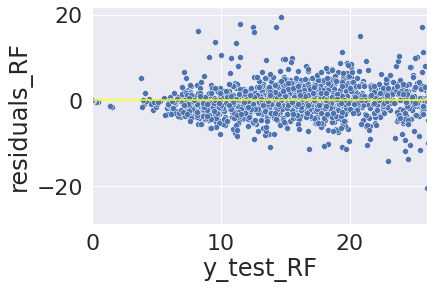

In [322]:
## hetroscadeasticity
residuals_RF = y_test-y_test_RF
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

p = sns.scatterplot(y_test_RF,residuals_RF)
plt.xlabel('y_test_RF')
plt.ylabel('residuals_RF')
# plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='yellow')

## **Gradient Boosting Regressor with GridSearchCV**

In [323]:
#Providing the range of values for chosen hyperparameters
# Number of trees
n_estimators = [40,60,80,100]

# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,80,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [324]:
param_dict

{'max_depth': [4, 6, 8, 10],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 80, 100, 150],
 'n_estimators': [40, 60, 80, 100]}

In [325]:
# Applying the Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV as gsv
# Create an instance of the GradientBoostingRegressor
gbm = GradientBoostingRegressor()

# Grid search
gb_grid = gsv(estimator=gbm,param_grid = param_dict,cv = 5, verbose=2)
                       

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=60; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=60; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=60; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=60; total time=   0.6s
[CV] END max_depth=4, min_sa

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80, 100, 150],
                         'n_estimators': [40, 60, 80, 100]},
             verbose=2)